iter 0:train_error=1.0807390846785394, valid_error=1.052703957684555
iter 10:train_error=1.0248428959573515, valid_error=1.0344738576151289
iter 20:train_error=1.0095962009409383, valid_error=1.0278027089416768
iter 30:train_error=1.0075643327757506, valid_error=1.0262439078130816
iter 40:train_error=1.0101696903526136, valid_error=1.025469079938955
iter 50:train_error=1.006135172511548, valid_error=1.0252063871188661
iter 60:train_error=1.0092351060010492, valid_error=1.024784026375535
iter 70:train_error=1.0054518147305906, valid_error=1.024695599976769
iter 80:train_error=1.0088289146742815, valid_error=1.0245027689264332
iter 90:train_error=1.0086372688448904, valid_error=1.0243527754569675
[[ 0.0075      0.02715489  0.03512313  0.04440217  0.11871239  0.06866848
   0.04336222  0.53155797  0.31557971  0.03557753  0.00880435  0.02570652
  -0.02660761  0.00261963  0.01369565]]


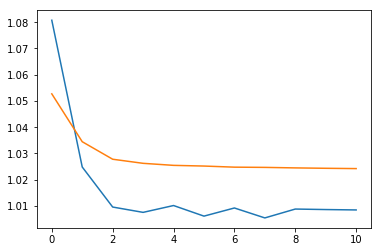

In [3]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

filename = "australian_scale"
learning_rate = 1  #learning rate
num_iter = 100  #iteration

#train model
def optimizer(data1,label1,data2,label2,starting_w):

    w = starting_w
    Loss_train = []
    Loss_valid = []

    for i in range(num_iter):
        eta = 1.0 / (learning_rate * (i + 1))  # step
        w = compute_gradient( w, data1, label1,eta,i)
        if i%10==0:
            loss = compute_error(w, data1, label1)
            loss_valid=compute_error(w,data2,label2)
            print('iter {0}:train_error={1}, valid_error={2}'.format \
                      (i, float(loss), float(loss_valid)))
            Loss_train.append(float(loss))
            Loss_valid.append(float(loss_valid))

    loss_final = compute_error(w, data1, label1)
    loss_final2 = compute_error(w, data2, label2)
    Loss_train.append(loss_final)
    Loss_valid.append(loss_final2)
    return [w,Loss_train,Loss_valid]

#gradient
def compute_gradient(w_current,data,label, eta, iter_count):

    N,M = shape(data)
    w_gradient=(np.zeros((1, M)))
    dataIndex = list(range(N))
    random.shuffle(dataIndex)   #check
    for j in range(N):
        i=dataIndex[j]
        v = data[i, :].T
        p=predict(w_current, v)
        if label[i]*p<1:
            w_gradient+=label[i]*v.T

    new_w = (1.0-1/(iter_count+1))*w_current + (eta/N) * w_gradient
    return new_w

def predict(w,v):

    return w*v

#loss function
def compute_error(w, data, label):

    totalError = 0
    w=w.A
    count = data.shape[0]
    for i in range(0, count):
        v = data[i, :].T
        p = predict(w, v)
        if label[i]*p<1:
            totalError=totalError+(1-p)
        else:
            totalError+=0

    error=learning_rate*0.5*sum(w ** 2)+totalError/float(count)
    return error

#divide into train dataset and test dataset
def get_data(filename):

    #read data
    data = load_svmlight_file(filename)
    X, y = data[0], data[1]
    count=X.shape[0]
    X=X.A
    X=np.column_stack((X, np.ones((count, 1))))
    X=mat(X)
    #divide into train dataset and test dataset
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8, random_state=0)

    return (train_X, valid_X, train_y, valid_y)

def plot_loss(y1,y2):

    plt.plot(range(11), array(y1))
    plt.figure
    plt.plot(range(11), array(y2))
    plt.show()

def linear_classification():

    # parameter initialization
    w=mat(np.zeros((1, 15)))

    train_X, valid_X, train_y, valid_y = get_data(filename)
    [w, loss_train, loss_valid] = optimizer(train_X, train_y, valid_X, valid_y, w)
    print(w)
    plot_loss(loss_train, loss_valid)

if __name__ =='__main__':

    linear_classification()
